In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt 
from sklearn.covariance import EmpiricalCovariance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import itertools

import pandas as pd 
import numpy as np 


In [ ]:
df_FF_raw = pd.read_csv('gp_data_1986_to_2015_with_factor.csv')

df_FF_raw.iloc[300:310,:]

,Month,Mkt-RF,SMB,HML,RF,Agric,Food,Soda,Beer,Smoke,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
300,201101,1.99,-2.52,0.82,0.01,5.01,-1.92,1.86,-3.62,-3.29,...,3.67,-0.48,2.80,-1.28,-2.39,2.57,2.05,3.91,1.48,7.50
301,201102,3.49,1.53,1.29,0.01,-1.20,6.75,3.20,0.60,8.65,...,4.27,1.42,2.97,1.38,3.92,1.52,4.50,9.97,3.04,3.90
302,201103,0.46,2.58,-1.76,0.01,0.33,1.64,4.58,3.35,6.33,...,0.44,3.01,1.47,0.48,1.85,-1.78,-0.47,2.83,-2.37,-2.25
303,201104,2.90,-0.37,-2.43,0.00,-4.16,5.70,5.20,3.90,5.39,...,0.67,2.93,4.06,5.20,1.40,-0.40,3.60,3.72,-0.85,2.42
304,201105,-1.27,-0.58,-2.05,0.00,2.86,2.14,3.66,0.49,4.50,...,5.71,-0.44,1.20,0.21,4.17,-2.65,-1.61,-2.64,-3.53,-3.48
305,201106,-1.75,-0.11,-0.42,0.00,1.51,-1.14,3.98,0.62,-5.60,...,-6.63,-0.47,-2.10,-1.41,1.58,-2.02,-1.09,-3.85,-4.38,-2.60
306,201107,-2.35,-1.37,-0.88,0.00,1.31,-0.37,-5.96,-2.97,2.86,...,-4.43,-5.09,-4.58,-0.10,-0.28,-3.58,-5.19,-6.76,-2.76,-4.44
307,201108,-5.99,-3.03,-2.56,0.01,-6.75,-1.40,2.24,2.24,0.33,...,-7.80,-6.98,-4.05,-3.37,-0.70,-9.09,-7.44,-17.45,-11.35,-3.80
308,201109,-7.59,-3.35,-1.71,0.00,-12.83,-3.56,-2.58,-3.84,-4.93,...,-12.98,-9.34,-8.14,-2.86,-5.32,-11.48,-7.90,-14.47,-14.33,-4.16
309,201110,11.35,3.32,0.13,0.00,20.97,3.88,2.53,1.93,7.61,...,12.77,15.28,13.76,9.14,10.09,13.17,13.46,19.99,14.13,9.42


### Getting the training and test data after finding the excess returns for each asset.

In [ ]:
Rf = df_FF_raw['RF'].values.copy()
for column in df_FF_raw.columns:
    if column in ['Month','RF', 'Mkt-RF', 'SMB', 'HML']:
        continue
    df_FF_raw[column] -= Rf
df_FF_raw.iloc[300:310,:]

,Month,Mkt-RF,SMB,HML,RF,Agric,Food,Soda,Beer,Smoke,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
300,201101,1.99,-2.52,0.82,0.01,5.00,-1.93,1.85,-3.63,-3.30,...,3.66,-0.49,2.79,-1.29,-2.40,2.56,2.04,3.90,1.47,7.49
301,201102,3.49,1.53,1.29,0.01,-1.21,6.74,3.19,0.59,8.64,...,4.26,1.41,2.96,1.37,3.91,1.51,4.49,9.96,3.03,3.89
302,201103,0.46,2.58,-1.76,0.01,0.32,1.63,4.57,3.34,6.32,...,0.43,3.00,1.46,0.47,1.84,-1.79,-0.48,2.82,-2.38,-2.26
303,201104,2.90,-0.37,-2.43,0.00,-4.16,5.70,5.20,3.90,5.39,...,0.67,2.93,4.06,5.20,1.40,-0.40,3.60,3.72,-0.85,2.42
304,201105,-1.27,-0.58,-2.05,0.00,2.86,2.14,3.66,0.49,4.50,...,5.71,-0.44,1.20,0.21,4.17,-2.65,-1.61,-2.64,-3.53,-3.48
305,201106,-1.75,-0.11,-0.42,0.00,1.51,-1.14,3.98,0.62,-5.60,...,-6.63,-0.47,-2.10,-1.41,1.58,-2.02,-1.09,-3.85,-4.38,-2.60
306,201107,-2.35,-1.37,-0.88,0.00,1.31,-0.37,-5.96,-2.97,2.86,...,-4.43,-5.09,-4.58,-0.10,-0.28,-3.58,-5.19,-6.76,-2.76,-4.44
307,201108,-5.99,-3.03,-2.56,0.01,-6.76,-1.41,2.23,2.23,0.32,...,-7.81,-6.99,-4.06,-3.38,-0.71,-9.10,-7.45,-17.46,-11.36,-3.81
308,201109,-7.59,-3.35,-1.71,0.00,-12.83,-3.56,-2.58,-3.84,-4.93,...,-12.98,-9.34,-8.14,-2.86,-5.32,-11.48,-7.90,-14.47,-14.33,-4.16
309,201110,11.35,3.32,0.13,0.00,20.97,3.88,2.53,1.93,7.61,...,12.77,15.28,13.76,9.14,10.09,13.17,13.46,19.99,14.13,9.42


In [ ]:
## Splitting datasets
df1 = df_FF_raw.copy()
df1['Month'] = df1['Month'].astype(str)
df1['Year'] = df1['Month'].str[:4].astype(int)

data_train = df1.loc[df1['Year'] < 2011]
data_test = df1.loc[df1['Year'] >= 2011]

In [ ]:
df_FF = data_train.drop(['Year'], axis = 1)
df_FF_test = data_test.drop(['Year'], axis = 1)

df_FF_test.head()

,Month,Mkt-RF,SMB,HML,RF,Agric,Food,Soda,Beer,Smoke,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
300,201101,1.99,-2.52,0.82,0.01,5.00,-1.93,1.85,-3.63,-3.30,...,3.66,-0.49,2.79,-1.29,-2.40,2.56,2.04,3.90,1.47,7.49
301,201102,3.49,1.53,1.29,0.01,-1.21,6.74,3.19,0.59,8.64,...,4.26,1.41,2.96,1.37,3.91,1.51,4.49,9.96,3.03,3.89
302,201103,0.46,2.58,-1.76,0.01,0.32,1.63,4.57,3.34,6.32,...,0.43,3.00,1.46,0.47,1.84,-1.79,-0.48,2.82,-2.38,-2.26
303,201104,2.90,-0.37,-2.43,0.00,-4.16,5.70,5.20,3.90,5.39,...,0.67,2.93,4.06,5.20,1.40,-0.40,3.60,3.72,-0.85,2.42
304,201105,-1.27,-0.58,-2.05,0.00,2.86,2.14,3.66,0.49,4.50,...,5.71,-0.44,1.20,0.21,4.17,-2.65,-1.61,-2.64,-3.53,-3.48


### Defining the individual 48 industry assets as "assets"

In [ ]:
assets = df_FF.iloc[:,5:]
assets

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,7.36,1.82,-1.76,-1.42,4.99,1.58,3.35,-1.34,-1.52,4.66,...,1.35,5.04,1.92,1.11,-0.65,2.26,6.07,1.52,1.91,3.35
1,13.45,7.36,11.15,7.18,11.67,10.19,7.75,14.14,10.20,8.80,...,10.08,6.50,8.32,6.68,8.74,10.51,6.88,6.46,7.65,10.75
2,2.14,7.24,10.29,8.57,10.92,5.05,6.26,4.47,4.97,5.57,...,5.01,2.62,6.81,8.51,5.82,6.62,4.71,8.72,4.89,5.92
3,4.72,-1.09,3.92,-3.44,3.12,3.39,7.84,-1.66,-2.18,-3.30,...,-1.45,-3.16,1.18,-1.22,3.34,-1.10,-6.62,-3.74,-3.81,-5.21
4,0.59,8.06,7.46,5.88,9.67,2.67,5.42,10.47,4.12,9.29,...,4.58,0.21,5.03,11.46,4.40,3.71,5.23,-1.70,4.70,5.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-9.24,0.99,-0.43,-0.02,0.02,-2.28,-1.07,-10.54,-3.97,-7.42,...,-4.15,-4.66,-7.56,-4.19,0.45,-10.26,-4.44,-5.98,-8.29,-7.58
296,-5.74,2.34,4.10,4.94,9.73,10.76,15.10,14.04,3.97,17.53,...,6.03,9.86,9.89,13.58,7.05,6.35,8.85,12.29,8.68,10.76
297,19.42,3.77,7.36,1.92,5.33,2.05,15.39,6.64,4.50,3.33,...,5.93,5.34,4.94,1.31,6.03,0.31,2.03,-1.33,7.32,-0.39
298,0.85,-2.61,0.96,2.00,-3.90,9.26,6.84,-1.78,-2.37,9.26,...,-0.71,2.41,0.28,4.94,4.16,0.01,-0.65,1.39,-1.13,-1.29


### Defining the 3 Factors as "F"

In [ ]:
F = df_FF.iloc[:,1:4]
F

,Mkt-RF,SMB,HML
0,0.65,1.22,0.52
1,7.13,-0.62,-0.85
2,4.88,-0.52,-0.44
3,-1.31,2.85,-2.86
4,4.62,-1.32,-0.14
...,...,...,...
295,-4.77,-3.02,-1.90
296,9.54,3.93,-3.23
297,3.88,1.07,-2.46
298,0.60,3.78,-0.95


### Doing the linear regression to get the betas of the 3 factors for each of the excess returns for the 48 individual industry groups


In [ ]:
def get_betas(assets, F):

  dic = {}

  for i in assets.columns:
    curr_asset = assets[i].values
    factors = F.values

    dic[i] = {}
    lr = LinearRegression(fit_intercept=False) # set to false as the 3 factor assumes zero alpha and zero epsilon 
    results = lr.fit(np.array(factors), np.array(curr_asset).reshape(-1,1))
    beta = results.coef_
    dic[i] = beta[0]

  return dic

In [ ]:
betas = pd.DataFrame.from_dict(get_betas(assets, F)).T
betas.columns = F.columns
betas.head()

,Mkt-RF,SMB,HML
Agric,0.736060,0.213702,0.129101
Food,0.683709,-0.320016,0.191329
Soda,0.953483,0.015250,0.522603
Beer,0.732838,-0.375233,0.012680
Smoke,0.736328,-0.241943,0.336275


### Find the covariance among the 3 Factors

In [ ]:
F_cov = F.cov()
F_cov

,Mkt-RF,SMB,HML
Mkt-RF,21.692354,3.107835,-3.668167
SMB,3.107835,11.148493,-3.385782
HML,-3.668167,-3.385782,9.495490


### Assuming no alpha and epsilon, estimate Mu using the 3 factor model expression for each of the individual industry groups

In [ ]:
def estimate_mu(data, betas):

    ## The data entry is to find the mean Rf, mean Mkt-Rf, mean SMB and mean HML
    ## The betas are for the individual weights for each factor, for each individual industry groups
       
    mean_rf = data.loc[:,'RF'].mean()
    mean_mkt_er = data.loc[:, 'Mkt-RF'].mean()

    mu_factor = mean_rf + betas["Mkt-RF"] * mean_mkt_er  + betas["SMB"] * data["SMB"].mean() + betas["HML"] * data["HML"].mean() 
    
    return mu_factor

In [ ]:
mu = estimate_mu(df_FF, betas).values # Converting to an array form for easy calculations later
mu

array([0.80544456, 0.74886321, 1.02422403, 0.72025537, 0.82681181,
       1.07071599, 1.23528468, 1.04105457, 0.79647828, 1.1237684 ,
       0.97923925, 0.80278712, 0.66341655, 1.059579  , 1.10399148,
       1.42269022, 1.17309637, 1.22086431, 1.22133144, 1.05623939,
       1.12748378, 1.05361195, 1.3103229 , 1.09663094, 1.18282849,
       0.91944441, 0.66111889, 1.12249144, 1.06564308, 0.82784172,
       0.72473651, 0.84236504, 0.93863985, 0.82342417, 0.86248274,
       0.96611602, 0.96371401, 1.02142954, 0.964895  , 1.02651749,
       0.94395643, 0.92538306, 0.92309475, 1.23856307, 1.06697973,
       1.28661974, 1.16163687, 1.04209707])

### Determining the 3-Factor Model's covariance matrix using the expression below where K = 3

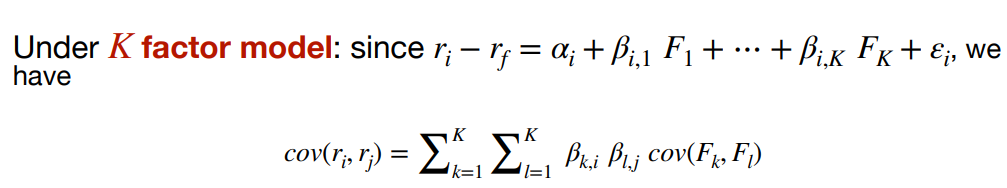

### Our Approach in deriving the covariance matrix:

- **1st**: Find all combinations of i and j through the usage of itertools
- **2nd:** Using the i,j combinations, we extract 2 rows (ie 2 industry groups) from main beta matrix for **each** cycle 
- **3rd:** Within each cycle, we fix the "k" as 0 while iterating through "l" which is from 0 to 2. Once all ls are iterated through, we increase "k" by 1 and iterate through "l"s again. Once all iterations when "k"=2 are completed, we end the cycle. Each cycle should have 9 iterations (for each "k","l" combinations)
- **4th:** Once all iterations are completed, we sum them up to give the covariance value between asset i and j which we save it in the covariance matrix

In [ ]:
# Getting the values in array form
betas = pd.DataFrame.from_dict(get_betas(assets, F)).T
betas.columns = F.columns

F_cov = F.cov().values
betas = betas.values

# Find the different i and j combinations
n = len(betas)

combs = list(itertools.permutations(np.arange(0, n), 2))
for i in range(n):
    combs.append((i, i))  # to add the combinations where i and j are the same

# print first 5 and last 5 combinations for checking
print("First 5:", combs[:5])
print("Last 5:", combs[-5:])

First 5: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
Last 5: [(43, 43), (44, 44), (45, 45), (46, 46), (47, 47)]


### Using the different i and j iterations, find the covariance matrix 

In [ ]:
betas = pd.DataFrame(betas) # Changing betas into a dataframe as the for function below uses df functions

names = assets.columns

F_cov = F.cov()
FF_cov = pd.DataFrame(np.zeros((48,48))) # Creating an empty 48 x 48 df to store the covariancce results

FF_cov.columns = names
FF_cov.index = names

overall = 0

for com in combs:
    
    i = com[0]
    j = com[1]
    
    assets_data = betas.iloc[[i,j]] # Find the betas df for the 2 assets
    
    count = 0
    
    total_sum = 0
    for k in range(3):
        for l in range(3):
            
            overall += 1
            count += 1

            addition = assets_data.iloc[0, k] * assets_data.iloc[1, l] * F_cov.iloc[k,l] # Extracting the 3 values for each iteration and multiplying them

            total_sum += addition #Add them up progressively

    FF_cov.iloc[i,j] = total_sum #Assign the final total sum after the 9 iterations to respective location in the final covariance matrix
            
print("OVERALL NUMBER OF ITERATIONS", overall) # To check, the number of iterations should be 48x48x9 = 20736
FF_cov

    

OVERALL NUMBER OF ITERATIONS 20736


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,12.513708,9.271931,14.321905,10.224600,10.134056,17.526225,22.343326,16.583486,11.535338,18.440358,...,15.451815,15.366888,15.292385,16.080812,13.911405,17.057086,14.440997,18.451990,21.529585,18.171549
Food,9.271931,9.724538,12.697022,10.415187,10.309324,13.091600,17.061851,13.867305,10.568904,15.014813,...,13.269214,13.053943,11.447542,13.171824,12.066718,16.628265,14.549466,12.699053,17.334165,15.258630
Soda,14.321905,12.697022,18.697876,13.293532,13.998301,20.703497,26.321545,20.491373,14.541528,22.588425,...,19.075535,19.382404,17.827578,19.004265,17.398250,23.738164,20.109700,22.528347,25.553607,21.987848
Beer,10.224600,10.415187,13.293532,11.475965,10.847683,14.075471,18.526245,14.901049,11.521159,16.105669,...,14.398134,13.859557,12.463089,14.585579,12.998332,17.103251,15.153808,12.801825,19.025335,16.706677
Smoke,10.134056,10.309324,13.998301,10.847683,11.114571,14.553643,18.763147,15.141528,11.263144,16.483969,...,14.326990,14.341726,12.607471,14.112010,13.078463,18.316355,15.819582,14.947414,18.747659,16.422170
Toys,17.526225,13.091600,20.703497,14.075471,14.553643,24.961831,31.587008,23.543771,16.131041,26.236479,...,21.752974,22.001897,21.596329,22.337980,19.687759,24.980597,20.925998,27.344162,30.134735,25.429557
Fun,22.343326,17.061851,26.321545,18.526245,18.763147,31.587008,40.168032,30.063631,20.888656,33.405751,...,27.942138,28.013184,27.441791,28.781274,25.244044,31.794598,26.840939,33.801139,38.639809,32.705672
Books,16.583486,13.867305,20.491373,14.901049,15.141528,23.543771,30.063631,23.014451,16.343130,25.412149,...,21.512556,21.550932,20.440123,21.861024,19.496836,25.406930,21.619567,24.882677,29.252385,25.019670
Hshld,11.535338,10.568904,14.541528,11.521159,11.263144,16.131041,20.888656,16.343130,12.089758,17.868725,...,15.522300,15.245514,14.137257,15.769757,14.036100,18.320760,15.903221,15.947512,20.842148,18.043081
Clths,18.440358,15.014813,22.588425,16.105669,16.483969,26.236479,33.405751,25.412149,17.868725,28.128199,...,23.670640,23.799852,22.742501,24.090305,21.454318,27.849314,23.590831,28.074033,32.319465,27.551230


### To check if the shape of the covariance matrix dataframe allows smooth numerical stability for the linear algebra solutions, we adopted 2 methods to check.

In [ ]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

is_pos_def(FF_cov)

False

In [ ]:
# See the property of the covariance matrix 
min( np.linalg.eigvals(FF_cov) ) 

(-4.5692562556729753e-14+0j)

### Numerical Stability and Introduction of Shrinkage Estimator
While we can see that the minimum eigenvalue is negative, the number is very small, suggesting the actual value might be zero. Hence, to ensure numerical stability for our covariance, we adopt **2 methods** to adjust our covariance matrix.

- Direct intervention through the introduction of epsilon to nudge the minimum eigenvalue in the positive range
- Introduction of Shrinkage constant with sample covariance where the final covariance matrix = ***lambda * FF_cov + (1-lambda) * sample_cov*** 

### Implementing the Direction Intervention Method

In [ ]:
# For numerical stability

epsilon = 0.00001
FF_cov2 = FF_cov + epsilon * np.identity(48)
FF_cov2

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,12.513718,9.271931,14.321905,10.224600,10.134056,17.526225,22.343326,16.583486,11.535338,18.440358,...,15.451815,15.366888,15.292385,16.080812,13.911405,17.057086,14.440997,18.451990,21.529585,18.171549
Food,9.271931,9.724548,12.697022,10.415187,10.309324,13.091600,17.061851,13.867305,10.568904,15.014813,...,13.269214,13.053943,11.447542,13.171824,12.066718,16.628265,14.549466,12.699053,17.334165,15.258630
Soda,14.321905,12.697022,18.697886,13.293532,13.998301,20.703497,26.321545,20.491373,14.541528,22.588425,...,19.075535,19.382404,17.827578,19.004265,17.398250,23.738164,20.109700,22.528347,25.553607,21.987848
Beer,10.224600,10.415187,13.293532,11.475975,10.847683,14.075471,18.526245,14.901049,11.521159,16.105669,...,14.398134,13.859557,12.463089,14.585579,12.998332,17.103251,15.153808,12.801825,19.025335,16.706677
Smoke,10.134056,10.309324,13.998301,10.847683,11.114581,14.553643,18.763147,15.141528,11.263144,16.483969,...,14.326990,14.341726,12.607471,14.112010,13.078463,18.316355,15.819582,14.947414,18.747659,16.422170
Toys,17.526225,13.091600,20.703497,14.075471,14.553643,24.961841,31.587008,23.543771,16.131041,26.236479,...,21.752974,22.001897,21.596329,22.337980,19.687759,24.980597,20.925998,27.344162,30.134735,25.429557
Fun,22.343326,17.061851,26.321545,18.526245,18.763147,31.587008,40.168042,30.063631,20.888656,33.405751,...,27.942138,28.013184,27.441791,28.781274,25.244044,31.794598,26.840939,33.801139,38.639809,32.705672
Books,16.583486,13.867305,20.491373,14.901049,15.141528,23.543771,30.063631,23.014461,16.343130,25.412149,...,21.512556,21.550932,20.440123,21.861024,19.496836,25.406930,21.619567,24.882677,29.252385,25.019670
Hshld,11.535338,10.568904,14.541528,11.521159,11.263144,16.131041,20.888656,16.343130,12.089768,17.868725,...,15.522300,15.245514,14.137257,15.769757,14.036100,18.320760,15.903221,15.947512,20.842148,18.043081
Clths,18.440358,15.014813,22.588425,16.105669,16.483969,26.236479,33.405751,25.412149,17.868725,28.128209,...,23.670640,23.799852,22.742501,24.090305,21.454318,27.849314,23.590831,28.074033,32.319465,27.551230


In [ ]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

is_pos_def(FF_cov2)

True

In [ ]:
# See the property of the covariance matrix 
min( np.linalg.eigvals(FF_cov2) )


(9.999999956640345e-06+0j)

After direct adjustment, the minimum eigenvalue has now moved into positive territory, allowing us to find the tangency portfolio and GMV.

In [ ]:
def tangency(mu, V):
    
    ###########
    # Construct the tangency portfolio using the closed form method
    # Input: mu is Estimated expected vector and V is the estimated covariance matrix
    # Output: The weights of the tangency portfolio
    ###########

    
    #tangency portfolio
    w_t = np.linalg.inv(V) @ mu
    w_t /= np.sum(w_t)

    return w_t

In [ ]:
def gmv(V):
    
    ###########
    # Construct the global minimum variance portfolio using the closed form method
    # Input: V is the estimated covariance matrix
    #        NB: the expected return vector is not needed here!
    # Output: The weights of the global minimum variance portfolio
    ###########

    #GMV
    n = len(V)
    w_g = np.linalg.inv(V) @ np.ones(n)
    w_g /= np.sum(w_g)
    
    return w_g

In [ ]:
def ewp(n):
    
    ###########
    # Construct the equally weighted portfolio
    # Input: n is the number of assets
    #        NB: neither the expected return vector nor covariance matrix is not needed here!
    # Output: The weights of the equally weighted portfolio
    ###########

    #GMV
    
    return np.ones(n)/n

In [ ]:
def evaluate_portfolio_performance_on_data(w, mu, V, rf = 0):
    
    ###########
    # Evaluate the performance of a portfolio (i.e., weight vector) given the expected return vector
    # and covariance matrix
    # Input: mu is the expected return vector, V is the covariance matrix, and rf is the risk free rate (default 0)
    #        w is the portfolio weight vector
    # Output: The performance metrics of the portfolio 
    #         (i.e., expected return, standard deviation, variance, and Sharpe ratio)
    ###########
    
    # Sanity check for the input format
    if V.shape[0] != V.shape[1]:
        print('Warning: V should be a square matrix')
    w = w.reshape((-1))
    mu = mu.reshape((-1))
    if (len(mu) != len(w)) or (V.shape[0] != len(mu)):
        print('Warning: mu, V, and w should contain the same number of assets')
    ### End of sanity check
    
    
    return {'Er': mu.T @ w, 'sigma': np.sqrt(w.T @ V @ w), 
            'var': w.T @ V @ w, 'Sharpe': (mu.T @ w - rf)/(np.sqrt(w.T @ V @ w)) }

In [ ]:
# Find the weights for the GMV portfolio
V = FF_cov2 
w_g = gmv(V)

# Prepare the parameters for portfolio evaluation
w = w_g
mu = mu

print("Weights for the GMV:", w_g)
evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)

Weights for the GMV: [ 0.18164204  0.12897399  0.02149461  0.10736233  0.10498022  0.03337833
 -0.11804785 -0.01230371  0.10907897 -0.05332379  0.10172551  0.12719163
  0.09959637 -0.04783883  0.03705802 -0.07674051 -0.07020138 -0.05488458
 -0.10835052  0.09933265 -0.0480077  -0.12273716 -0.15077002 -0.06330543
 -0.02123706  0.16322744  0.3746005  -0.00185342  0.02007328  0.11840476
  0.21548899  0.02170537  0.08211301 -0.00276967 -0.00087651 -0.05031307
  0.02648834  0.00293552  0.00937739  0.01511283  0.09716083  0.02316356
  0.05388644 -0.15309052 -0.06954553  0.04888515 -0.13529636 -0.06294448]


{'Er': 0.33686683674663437,
 'Sharpe': 146.7269909592765,
 'sigma': 0.002295875043468522,
 'var': 5.2710422152215876e-06}

In [ ]:
# Find the weights for the Tangency portfolio
V = FF_cov2 
w_t = tangency(mu, V)

# Prepare the parameters for portfolio evaluation
w = w_t
mu = mu

print("Weights for the Tangency Portfolio:", w_t)
evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)

Weights for the Tangency Portfolio: [ 0.18164195  0.12897393  0.02149463  0.10736225  0.10498018  0.03337834
 -0.11804777 -0.01230369  0.10907891 -0.05332374  0.1017255   0.12719155
  0.09959627 -0.04783879  0.03705803 -0.07674038 -0.07020131 -0.05488451
 -0.10835047  0.09933263 -0.04800767 -0.12273712 -0.1507699  -0.06330538
 -0.02123699  0.16322741  0.37460033 -0.00185338  0.02007329  0.11840471
  0.21548891  0.02170534  0.08211297 -0.00276975 -0.00087658 -0.05031311
  0.02648829  0.00293554  0.00937739  0.01511284  0.09716079  0.02316354
  0.05388642 -0.1530904  -0.06954547  0.04888522 -0.13529629 -0.06294445]


{'Er': 0.3368673492958216,
 'Sharpe': 146.72710255708805,
 'sigma': 0.0022958767904842563,
 'var': 5.27105023708429e-06}

### Interpretation of the special portfolios after the direct adjustment to the covariance matrix 
As we can see, the GMV and the Tangency are very similar in terms of the portfolio performance metrics and the weights allocated to the assets. 

This observation could be caused by the extremely low variance from the GMV and the tangency portfolio. They are so low that the the portfolios created are almost riskfree while generating 

Therefore, with the expected returns almost on the y-axis of the risk-return diagram, it makes sense for the sharpe ratio to be extremely high of exceedingly 100 (potentially could have reached infinity). Given that the tangency portfolio seeks for the portfolio with the highest sharpe ratio, the GMV with near infinity sharpe ratio would also be the tangency portfolio. 

However, while we could recommend this portfolio for our client, we should also seek caution to this method as a riskfree monthly excess returns of 0.28% (which translates into annual effective excess returns of 3.4%) sounds too good to be true. This suggests that there might lie with rather high model risks through the usage of the 3-factor model to estimate the parameters. 

Hence, to reduce the model risks, we adopted 2 methods as listed below:
- Out-of-Sample analysis for this model 
- Usage of robust estimation of covariance matrix through a shrinkage estimator of the FF-covariance matrix and the sample covariance matrix.



### Out-of-Sample Analysis for the Direct intervention tangency and GMV

In [ ]:
def evaluate_portfolio_performance_on_data(w, mu, V, rf = 0):
    
    ###########
    # Evaluate the performance of a portfolio (i.e., weight vector) given the expected return vector
    # and covariance matrix
    # Input: mu is the expected return vector, V is the covariance matrix, and rf is the risk free rate (default 0)
    #        w is the portfolio weight vector
    # Output: The performance metrics of the portfolio 
    #         (i.e., expected return, standard deviation, variance, and Sharpe ratio)
    ###########
    
    # Sanity check for the input format
    if V.shape[0] != V.shape[1]:
        print('Warning: V should be a square matrix')
    w = w.reshape((-1))
    mu = mu.reshape((-1))
    if (len(mu) != len(w)) or (V.shape[0] != len(mu)):
        print('Warning: mu, V, and w should contain the same number of assets')
    ### End of sanity check
    
    
    return {'Er': mu.T @ w, 'sigma': np.sqrt(w.T @ V @ w), 
            'var': w.T @ V @ w, 'Sharpe': (mu.T @ w - rf)/(np.sqrt(w.T @ V @ w)) }

In [ ]:
def get_EF_on_data (w_t, w_g, mu, V, rf = 0):

    ###########
    # Get the (evaluated) efficient frontier curve using the two-fund separation method
    #
    # Input: data contains historical return information to evaluate on (every column corresponds to an asset)
    #        w_t and w_g are the constructed tangency and global minimum variance portfolios, respectively
    #        (NB: if w_t and w_g are obtained from the training data but "data" is actually testing data,
    #         then the output EF could be highly sub-optimal!)
    # Output: The risk-return combinations of portfolios on the (evaluated) EF 
    ###########
    
    trange = np.arange(0,3,0.01)
    sigma_range = np.zeros_like (trange) * np.nan
    Er_range = np.zeros_like (trange) * np.nan

    for i in np.arange(len(trange)):
        w_mix = trange[i] * w_t + (1-trange[i]) * w_g
        sigma_range[i] = evaluate_portfolio_performance_on_data (w_mix, mu, V, rf = 0) ['sigma']
        Er_range[i] = evaluate_portfolio_performance_on_data (w_mix, mu, V, rf = 0) ['Er']
        
    return sigma_range, Er_range

In [ ]:
from matplotlib.pyplot import figure

def plot_evaluation_results_out_sample (mu_test, V_test, mu_train, V_train):

    ###########
    # A Summary function
    #
    # Input: The normal portfolios are all obtrained from "data_train"; 
    #        The performances of ALL portfolios are all evaluated on "data_test" ;
    #        The ROBUST portfolios are all obtrained from "data_train_full";
    #        The Market portfolio is obtained from "data_test_full";
    # Output: A plot that contains tangency portfolio, GMV, EF, equally weighted portfolio, TAN-Robust and GMV-Robust
    ###########
    
    
    ############################### "TRUE" EF CURVE ###################################
    
    ####
    # Construct the "True" tangency, GMV, equally weighted portfolios from the testing data...
    # and evaluate them on testing data
    

    mu_test = mu_test
    V_test = V_test

    w_t_test = tangency(mu_test , V_test)
    w_g_test = gmv(V_test)
    
  
    ####
    # The "True" EF is based on portfolios both constructed and evaluated on the TESTING data
    figure(figsize=(10, 6), dpi=80)
    sigma_true_range, Er_true_range = get_EF_on_data (w_t_test, w_g_test, mu_test, V_test, rf = 0)
    plt.plot(sigma_true_range, Er_true_range, label = 'True EF')

    # Plot the Tangency portfolio (TAN) on test data (True)
    plt.scatter( evaluate_portfolio_performance_on_data (w_t_test, mu_test, V_test, rf = 0)['sigma'], 
                evaluate_portfolio_performance_on_data (w_t_test, mu_test, V_test, rf = 0)['Er'], marker='*', color = 'blue',label = 'TAN-True')
    
    # Plot the Global minimum variance portfolio (GMV) on test data (True)
    plt.scatter( evaluate_portfolio_performance_on_data (w_g_test, mu_test, V_test, rf = 0)['sigma'], 
                evaluate_portfolio_performance_on_data (w_g_test, mu_test, V_test, rf = 0)['Er'], marker='^', color = 'blue',label = 'GMV-True')
    #
    ####
    
    ############################### SPECIAL PORTFOLIOS FROM TRAINING DATA ###################################
    
    ####
    # Obtain the special portfolios (After direct intervention) constructed from the training data
    mu_train = mu_train
    V_train = V_train

    w_t_train = tangency(mu_train , V_train)
    w_g_train = gmv(V_train)
    
    n = len(mu_train)
    w_e = ewp(n) # NB: the EWP portfolio is actually independent of the historical return
     
   
    #
    ####
    
    
    ################################ PLOT SPECIAL PORTFOLIOS ON TEST DATA ###################################
    
    # Plot the Tangency portfolio (TAN) on test data (realised)
    plt.scatter( evaluate_portfolio_performance_on_data (w_t_train, mu_test, V_test, rf = 0)['sigma'], 
                evaluate_portfolio_performance_on_data (w_t_train, mu_test, V_test, rf = 0)['Er'], marker='*', color = 'red',label = 'TAN-realised')
    
    # Plot the Global minimum variance portfolio (GMV) on test data (realised)
    plt.scatter( evaluate_portfolio_performance_on_data (w_g_train, mu_test, V_test, rf = 0)['sigma'], 
                evaluate_portfolio_performance_on_data (w_g_train, mu_test, V_test, rf = 0)['Er'], marker='^', color = 'red',label = 'GMV-realised')
    
    # Plot the Equally weighted portfolio (EWP) on test data (realised)
    plt.scatter( evaluate_portfolio_performance_on_data (w_e, mu_test, V_test, rf = 0)['sigma'], 
                evaluate_portfolio_performance_on_data (w_e, mu_test, V_test, rf = 0)['Er'], marker='+', color = 'red',label = 'EWP')
    
    # individual assets, assuming input is a square covariance matrix
    dimension = np.shape(V_train)[0]

    for i in range(0,dimension):
        name = V_test.columns[i]
        plt.scatter(np.sqrt(V_test.iloc[i,i]), mu_test[i], marker='p', color = 'black', alpha = 0.6)
        plt.text(np.sqrt(V_test.iloc[i,i])+.0005, mu_test[i]+.00005, name, fontsize=9, alpha = 0.2)
    
    #
    ####
    
    ############################### 'REALISED' EF CURVE ####################################
    
    ####
    # The "Realized" EF is based on portfolios constructed from TRAINING data but evaluated on TESTING data
    sigma_realized_range, Er_realized_range = get_EF_on_data (w_t_train, w_g_train, mu_test, V_test, rf = 0)
    plt.plot(sigma_realized_range, Er_realized_range, '--', label = 'Realized EF')
    #
    ####

    plt.legend()
    plt.title('Risk-Return Diagram (Out-of-sample Analysis)')
    plt.xlabel('$\sigma$ (%)')
    plt.ylabel('E[r] (%)')
    
    plt.show()
    
    ###### PRINT ADDITIONAL INFORMATION
    print('******')
    print('The tangency portfolio constructed from the testing data is: ', np.round(w_t_test,3))
    print('The global minimum variance portfolio constructed from the testing data  is: ', np.round(w_g_test,3))
    print('******') 
    print('The tangency portfolio constructed from the training data is: ', np.round(w_t_train,3))
    print('The global minimum variance portfolio constructed from the training data  is: ', np.round(w_g_train,3))
    print('******')
    print('Realised portfolio sigma: ', evaluate_portfolio_performance_on_data (w_t_train, mu_test, V_test, rf = 0)['sigma'])
    print('Realised portfolio Er: ', evaluate_portfolio_performance_on_data (w_t_train, mu_test, V_test, rf = 0)['Er'])
    print('Realised portfolio Sharpe: ', evaluate_portfolio_performance_on_data (w_t_train, mu_test, V_test, rf = 0)['Sharpe'])
    print('True portfolio sigma: ', evaluate_portfolio_performance_on_data (w_t_test, mu_test, V_test, rf = 0)['sigma'])
    print('True portfolio Er: ', evaluate_portfolio_performance_on_data (w_t_test, mu_test, V_test, rf = 0)['Er'])
    print('True portfolio Sharpe: ', evaluate_portfolio_performance_on_data (w_t_test, mu_test, V_test, rf = 0)['Sharpe'])
    print('Difference in Sharpe: ', -evaluate_portfolio_performance_on_data (w_t_train, mu_test, V_test, rf = 0)['Sharpe'] + evaluate_portfolio_performance_on_data (w_t_test, mu_test, V_test, rf = 0)['Sharpe'])

In [ ]:
def estimate_mu_general(data):

    ## The data entry is to find the mean Rf, mean Mkt-Rf, mean SMB and mean HML and to find the betas
    ## The betas are for the individual weights for each factor, for each individual industry groups

    assets = data.iloc[:,5:]
    F = data.iloc[:,1:4]

    betas = pd.DataFrame.from_dict(get_betas(assets, F)).T
    betas.columns = F.columns
    # print("Betas: ", betas.head())
    # print("-------")

    mean_rf = data.loc[:,'RF'].mean()
    mean_mkt_er = data.loc[:, 'Mkt-RF'].mean()

    mu_factor = mean_rf + betas["Mkt-RF"] * mean_mkt_er  + betas["SMB"] * data["SMB"].mean() + betas["HML"] * data["HML"].mean() 
    
    return mu_factor

In [ ]:
def estimate_cov_general(data, adj):
    
    # Extract the right values
    assets = data.iloc[:,5:]
    F = data.iloc[:,1:4]

    # Find the betas and the Factor covariances
    betas = pd.DataFrame.from_dict(get_betas(assets, F)).T
    betas.columns = F.columns
    F_cov = F.cov()
    n = len(betas)

    # Find combinations of i and j
    combs = list(itertools.permutations(np.arange(0, n), 2))
    for i in range(n):
        combs.append((i, i))
        
    # Find the names of assets
    names = assets.columns

    # Set up an empty df to collect results
    FF_cov = pd.DataFrame(np.zeros((48,48)))

    FF_cov.columns = names
    FF_cov.index = names

    # Start iterating
    overall = 0

    for com in combs:
        
        i = com[0]
        j = com[1]
      
        assets_data = betas.iloc[[i,j]]
        count = 0
        
        total_sum = 0
        for k in range(3):
            for l in range(3):
                
                overall += 1
                count += 1
                addition = assets_data.iloc[0, k] * assets_data.iloc[1, l] * F_cov.iloc[k,l]

                total_sum += addition

                FF_cov.iloc[i,j] = total_sum
                
    print("OVERALL NUMBER OF ITERATIONS", overall)

    if adj == True:
        epsilon = 0.00001
        FF_cov2 = FF_cov + epsilon * np.identity(48)
    
        return FF_cov2

    else:

        return FF_cov

In [ ]:
mu_train = estimate_mu_general(df_FF).values 
V_train = estimate_cov_general(df_FF, True)

mu_test = estimate_mu_general(df_FF_test).values
V_test = estimate_cov_general(df_FF_test, True)

# Checking the differences
# print(mu_train - mu_test)
# print(V_train - V_test)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


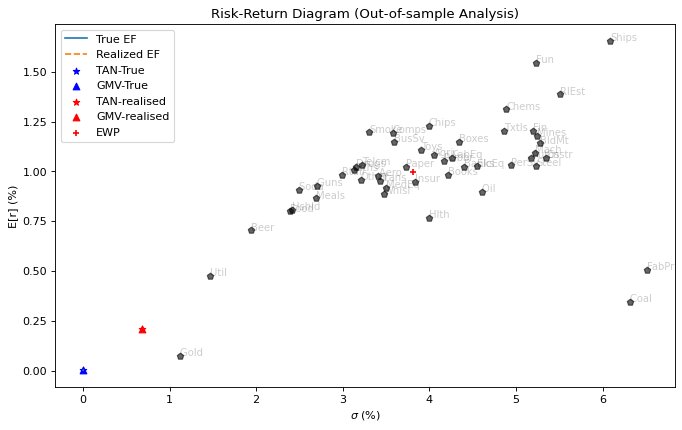

******
The tangency portfolio constructed from the testing data is:  [ 0.006  0.11   0.104  0.147  0.002 -0.012 -0.126  0.014  0.098  0.051
  0.085  0.07   0.061 -0.085  0.018 -0.034 -0.042 -0.022 -0.037  0.115
 -0.037  0.001 -0.03   0.039 -0.183  0.072  0.313 -0.074  0.113 -0.003
  0.203  0.023 -0.017 -0.002 -0.02  -0.042  0.016  0.019 -0.029  0.04
  0.058  0.061  0.095 -0.015  0.03  -0.103 -0.078  0.03 ]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.006  0.11   0.104  0.147  0.002 -0.012 -0.126  0.014  0.098  0.051
  0.085  0.07   0.061 -0.085  0.018 -0.034 -0.042 -0.022 -0.037  0.115
 -0.037  0.001 -0.03   0.039 -0.183  0.072  0.313 -0.074  0.113 -0.003
  0.203  0.023 -0.017 -0.002 -0.02  -0.042  0.016  0.018 -0.029  0.04
  0.058  0.061  0.095 -0.015  0.03  -0.103 -0.078  0.03 ]
******
The tangency portfolio constructed from the training data is:  [ 0.182  0.129  0.021  0.107  0.105  0.033 -0.118 -0.012  0.109 -0.053
  0.102  0.127  0.1   -0.048  

In [ ]:
plot_evaluation_results_out_sample (mu_test, V_test, mu_train, V_train)

From the out-of-sample analysis, we can see that both the "true" and the "realised" tangency and GMV portfolios are the same point respectively. 

However, we can also observe that the difference in sharpe ratio between both realised and true portfolios is high as well. It is 0.735 which is nearly 70% of the sharpe ratio of that of the true portfolio. 

This suggests that this model prediction power for out-of-sample datasets is low. Given that we would be investing money into portfolios that are subjected to future price movements, we are essentially subjecting our portfolio allocations to out-of-sample datasets. 

Therefore, we would require a more robust model that would have stronger out-of-sample performance. 

### 2nd: Usage of robust estimation of covariance matrix through a shrinkage estimator of the FF-covariance matrix and the sample covariance matrix.

Since the 1st model of an epsilon adjustment has poor out-of-sample performance, we adopt another method to estimate the covariance matrix which is the usage of "shrinkage" estimator. 

The "shrinkage" estimator concept was first proposed by Ledoit and Wolf in their seminal paper published in 2004. We modified it to suit our parameter estimation to incorporate the sample covariance to provide our final covariance matrix with more numerical stability. It has the following expression: 

***Covariance = lambda * Covariance_implied_by_FF + (1-lambda) * Sample Covariance***

In [ ]:
# Since we are using the shrinkage estimator, we do not add an epsilon adjustment here

def estimate_cov_shrinkage(data, lamb):
    
    # Extract the right values
    assets = data.iloc[:,5:]
    F = data.iloc[:,1:4]

    # Find the betas and the Factor covariances
    betas = pd.DataFrame.from_dict(get_betas(assets, F)).T
    betas.columns = F.columns
    F_cov = F.cov()
    n = len(betas)

    # Find combinations of i and j
    combs = list(itertools.permutations(np.arange(0, n), 2))
    for i in range(n):
        combs.append((i, i))
        
    # Find the names of assets
    names = assets.columns

    # Set up an empty df to collect results
    FF_cov = pd.DataFrame(np.zeros((48,48)))

    FF_cov.columns = names
    FF_cov.index = names

    # Start iterating
    overall = 0

    for com in combs:
        
        i = com[0]
        j = com[1]
      
        assets_data = betas.iloc[[i,j]]
        count = 0
        
        total_sum = 0
        for k in range(3):
            for l in range(3):
                
                overall += 1
                count += 1
                addition = assets_data.iloc[0, k] * assets_data.iloc[1, l] * F_cov.iloc[k,l]

                total_sum += addition

                FF_cov.iloc[i,j] = total_sum
                
    print("OVERALL NUMBER OF ITERATIONS", overall)

    FF_cov2 = lamb * FF_cov + (1 - lamb) * assets.cov()
    
    return FF_cov2

To test the method, we ran the model on a sample lambda of 0.5. The results are shown below.

In [ ]:
# Find the weights for the GMV portfolio using training data ("df_FF")
V = estimate_cov_shrinkage(df_FF, 0.5)
mu = estimate_mu_general(df_FF).values
w_g = gmv(V)

# Prepare the parameters for portfolio evaluation
w = w_g

print("Weights for the GMV:", w_g)
evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)

OVERALL NUMBER OF ITERATIONS 20736
Weights for the GMV: [ 0.10218907  0.0448029   0.00677071 -0.00255064 -0.03902967 -0.00519058
 -0.05655058  0.12266085  0.25866408 -0.08506313 -0.05392484  0.09998972
  0.01203524 -0.24368887 -0.09517246 -0.0131883  -0.1203047  -0.18853963
 -0.08460881  0.09032646 -0.03785442 -0.18603927 -0.10404071 -0.17109589
 -0.01714403  0.12281099  0.07124089 -0.00240461 -0.01927682  0.166024
  0.49174235  0.09867213 -0.03314477 -0.14242445  0.11705834  0.07654161
 -0.03556775  0.19786986  0.13748309  0.30371456  0.04659028  0.21575046
  0.08490748 -0.14908383 -0.09005902  0.12698887  0.00597665 -0.02486284]


{'Er': 0.48082651689833183,
 'Sharpe': 0.21515270040879972,
 'sigma': 2.2348151614399447,
 'var': 4.994398805801847}

In [ ]:
# Find the weights for the Tangency portfolio
V = estimate_cov_shrinkage(df_FF, 0.5)
mu = estimate_mu_general(df_FF).values
w_t = tangency(mu, V)

# Prepare the parameters for portfolio evaluation
w = w_t

print("Weights for the Tangency Portfolio:", w_t)
evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)

OVERALL NUMBER OF ITERATIONS 20736
Weights for the Tangency Portfolio: [ 0.07432985  0.04342623  0.01131064 -0.05302578 -0.00673857  0.00372218
 -0.01561805  0.05324612  0.19411116 -0.10526293 -0.03272917  0.07323855
 -0.04345103 -0.18739706 -0.05126859  0.0456586  -0.07165072 -0.09650709
 -0.05084977  0.0520292  -0.04710684 -0.14310519 -0.05837716 -0.11348858
 -0.00241621  0.10047091  0.05481265  0.01588022 -0.01585877  0.13391274
  0.40979377  0.07902571 -0.02294022 -0.1884834   0.07656881  0.04607158
 -0.01165872  0.15327377  0.08313402  0.26114731  0.03641613  0.16646984
  0.03639716  0.02186241 -0.05524657  0.11564967  0.06372829 -0.03250712]


{'Er': 0.7381336089679815,
 'Sharpe': 0.2665754102631052,
 'sigma': 2.7689485997206447,
 'var': 7.667076347894919}

The training set gives us a sharpe ratio of 0.267 with a more reasonable variance of 7.667 as compared to the near-zero variance from the direct intervention method

However, we need to conduct out-of-sample analysis to find the right model hyperparameters, namely the optimal lambda. 

### Conducting out-of-sample analysis

To determine the optimal lambda, we ran multiple out-of-sample analyses with both the 'realised' and 'true' portfolios. The definitions of these portfolios are defined below.

- 'Realised' portfolio: train-data optimised weights on test-data
- 'True' portfolio: test-data optimised weights on test-data

For a range of lambdas, we ran multiple experiments to determine the optimal lambda. To determine the optimal lambda, we decided to use the difference of the sharpe ratio between the 'realised' portfolio and the 'true' portfolio as the key benchmark. We would pick the lambda that gives us the minimum sharpe ratio difference.

The reason is that we wish to maximise our model's prediction power (on maximum sharpe ratios) in out-of-sample datasets. Hence, the model with the minimal sharpe ratio difference would reflect the more generalised nature of the model in accounting new data.

We pick Sharpe ratio as the benchmark instead of ER or Sigma is because of 2 reasons. Firstly, the sharpe ratio incorporates both ER and sigma, hence is more comprehensive as a benchmark. Secondly, the objective of this challenge is to seek the portfolio that gives the highest sharpe ratio, therefore the model that is most robust in maximising sharpe ratio in out-of-sample datasets would best achieve our objective.

We ran experiments where lambda = 0.5, 0.3, 0.1, 0.75, 0.8, 0.85 and 0.9.

While this method is not comprehensive, iterating each lambda to derive multiple covariance matrices and the weights from the optimal portfolios are overly intensive computationally. Hence, we adopted a rather discrete approach.

In [ ]:
mu_train2 = estimate_mu_general(df_FF).values 
V_train2 = estimate_cov_shrinkage(df_FF, 0.5)

mu_test2 = estimate_mu_general(df_FF_test).values
V_test2 = estimate_cov_shrinkage(df_FF_test, 0.5)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


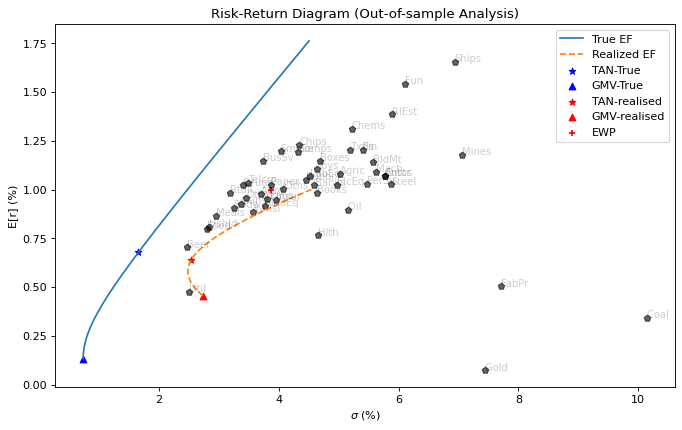

******
The tangency portfolio constructed from the testing data is:  [ 0.105  0.513 -0.553  0.267  0.147 -0.155 -0.083 -0.026 -0.226  0.09
  0.052 -0.378  0.03  -0.211  0.449  0.19  -0.181 -0.257 -0.476 -0.114
  1.012 -0.347  0.013 -0.438 -0.303  0.64   0.05   0.002  0.079  0.065
 -0.097  0.405 -0.116  0.346 -0.457  0.482  0.313 -0.242 -0.383  0.138
  0.55   0.312  0.112  0.806 -0.896  0.122 -0.414  0.061]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.107  0.118 -0.257  0.396  0.114 -0.312 -0.089 -0.063  0.052  0.091
  0.098 -0.251 -0.457 -0.097 -0.216  0.112 -0.256 -0.183 -0.293  0.021
  0.447 -0.238 -0.093 -0.179 -0.264  0.367  0.133  0.113  0.067 -0.057
  0.196  0.172  0.016  0.395 -0.3   -0.247  0.646  0.251 -0.302 -0.08
  0.981  0.233  0.068  0.399 -0.162  0.041 -0.237  0.001]
******
The tangency portfolio constructed from the training data is:  [ 0.074  0.043  0.011 -0.053 -0.007  0.004 -0.016  0.053  0.194 -0.105
 -0.033  0.073 -0.043 -0.187 -

In [ ]:
plot_evaluation_results_out_sample (mu_test2, V_test2, mu_train2, V_train2)

In [ ]:
mu_train3 = estimate_mu_general(df_FF).values 
V_train3 = estimate_cov_shrinkage(df_FF, 0.3)

mu_test3 = estimate_mu_general(df_FF_test).values
V_test3 = estimate_cov_shrinkage(df_FF_test, 0.3)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


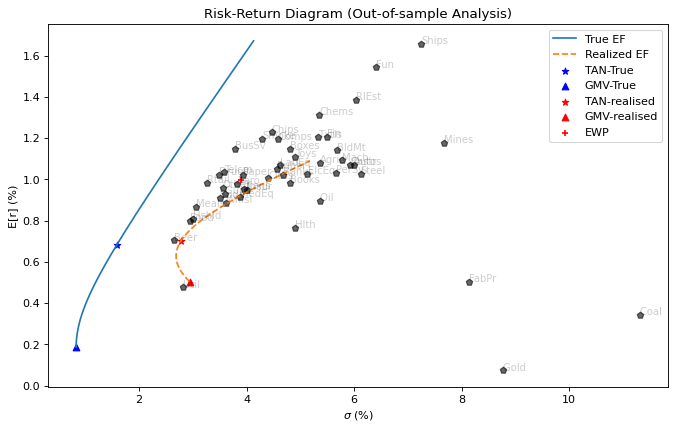

******
The tangency portfolio constructed from the testing data is:  [ 0.106  0.515 -0.556  0.261  0.148 -0.153 -0.086 -0.028 -0.231  0.089
  0.05  -0.375  0.037 -0.212  0.456  0.193 -0.18  -0.257 -0.477 -0.113
  1.019 -0.352  0.014 -0.44  -0.304  0.642  0.05   0.002  0.078  0.063
 -0.097  0.405 -0.117  0.353 -0.459  0.488  0.313 -0.241 -0.387  0.139
  0.545  0.314  0.114  0.805 -0.899  0.122 -0.416  0.056]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.107  0.156 -0.286  0.383  0.117 -0.296 -0.089 -0.059  0.026  0.091
  0.093 -0.264 -0.412 -0.107 -0.152  0.12  -0.249 -0.19  -0.31   0.008
  0.5   -0.248 -0.083 -0.204 -0.268  0.393  0.125  0.102  0.069 -0.044
  0.168  0.195  0.004  0.388 -0.316 -0.176  0.614  0.202 -0.309 -0.059
  0.939  0.24   0.071  0.441 -0.233  0.048 -0.254  0.008]
******
The tangency portfolio constructed from the training data is:  [ 0.06   0.044  0.012 -0.057  0.003  0.    -0.006  0.038  0.17  -0.103
 -0.028  0.064 -0.041 -0.152

In [ ]:
plot_evaluation_results_out_sample (mu_test3, V_test3, mu_train3, V_train3)

In [ ]:
mu_train4 = estimate_mu_general(df_FF).values 
V_train4 = estimate_cov_shrinkage(df_FF, 0.1)

mu_test4 = estimate_mu_general(df_FF_test).values
V_test4 = estimate_cov_shrinkage(df_FF_test, 0.1)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


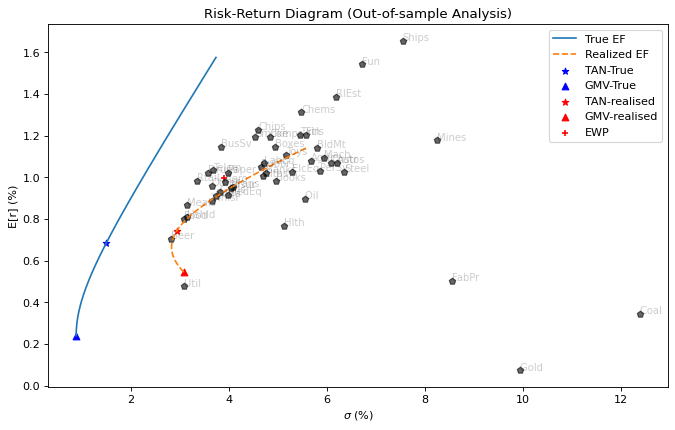

******
The tangency portfolio constructed from the testing data is:  [ 0.107  0.517 -0.558  0.256  0.148 -0.152 -0.088 -0.03  -0.234  0.088
  0.049 -0.371  0.043 -0.212  0.462  0.195 -0.18  -0.257 -0.478 -0.112
  1.025 -0.356  0.014 -0.441 -0.304  0.644  0.049  0.002  0.078  0.061
 -0.097  0.405 -0.118  0.359 -0.46   0.492  0.314 -0.239 -0.39   0.14
  0.54   0.316  0.117  0.804 -0.899  0.121 -0.419  0.051]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.107  0.195 -0.315  0.369  0.12  -0.28  -0.089 -0.055 -0.001  0.09
  0.088 -0.276 -0.365 -0.117 -0.088  0.128 -0.241 -0.197 -0.327 -0.005
  0.553 -0.259 -0.072 -0.228 -0.271  0.419  0.117  0.091  0.069 -0.032
  0.14   0.217 -0.008  0.384 -0.331 -0.105  0.582  0.154 -0.318 -0.038
  0.896  0.248  0.076  0.481 -0.304  0.055 -0.271  0.013]
******
The tangency portfolio constructed from the training data is:  [ 0.049  0.044  0.013 -0.057  0.009 -0.003 -0.     0.027  0.153 -0.1
 -0.025  0.057 -0.036 -0.126 -0.

In [ ]:
plot_evaluation_results_out_sample (mu_test4, V_test4, mu_train4, V_train4)

In [ ]:
mu_train5 = estimate_mu_general(df_FF).values 
V_train5 = estimate_cov_shrinkage(df_FF, 0.75)

mu_test5 = estimate_mu_general(df_FF_test).values
V_test5 = estimate_cov_shrinkage(df_FF_test, 0.75)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


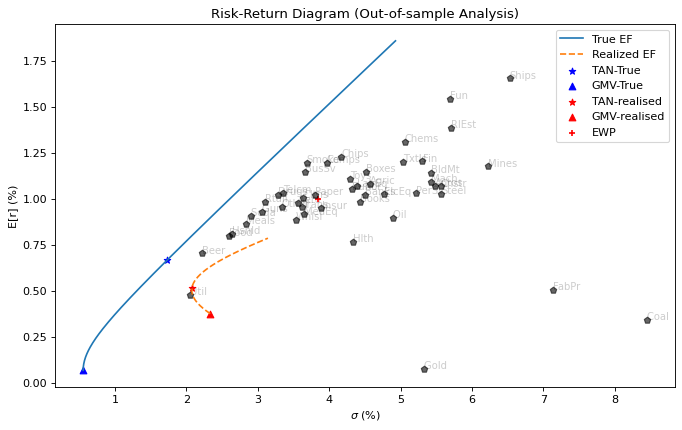

******
The tangency portfolio constructed from the testing data is:  [ 0.104  0.507 -0.547  0.275  0.146 -0.158 -0.08  -0.024 -0.218  0.092
  0.055 -0.381  0.016 -0.208  0.433  0.185 -0.183 -0.255 -0.473 -0.114
  0.997 -0.341  0.012 -0.432 -0.303  0.634  0.052  0.003  0.079  0.067
 -0.094  0.403 -0.113  0.339 -0.453  0.468  0.317 -0.238 -0.378  0.134
  0.562  0.309  0.108  0.803 -0.886  0.122 -0.409  0.067]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.108  0.069 -0.222  0.41   0.111 -0.331 -0.091 -0.07   0.083  0.091
  0.103 -0.234 -0.513 -0.086 -0.294  0.103 -0.267 -0.175 -0.271  0.039
  0.383 -0.228 -0.106 -0.148 -0.26   0.336  0.143  0.128  0.066 -0.075
  0.231  0.144  0.03   0.406 -0.282 -0.335  0.687  0.314 -0.293 -0.107
  1.034  0.224  0.064  0.345 -0.071  0.032 -0.217 -0.009]
******
The tangency portfolio constructed from the training data is:  [ 0.102  0.043  0.009 -0.041 -0.026  0.009 -0.036  0.088  0.241 -0.107
 -0.043  0.092 -0.041 -0.253

In [ ]:
plot_evaluation_results_out_sample (mu_test5, V_test5, mu_train5, V_train5)

In [ ]:
mu_train6 = estimate_mu_general(df_FF).values 
V_train6 = estimate_cov_shrinkage(df_FF, 0.8)

mu_test6 = estimate_mu_general(df_FF_test).values
V_test6 = estimate_cov_shrinkage(df_FF_test, 0.8)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


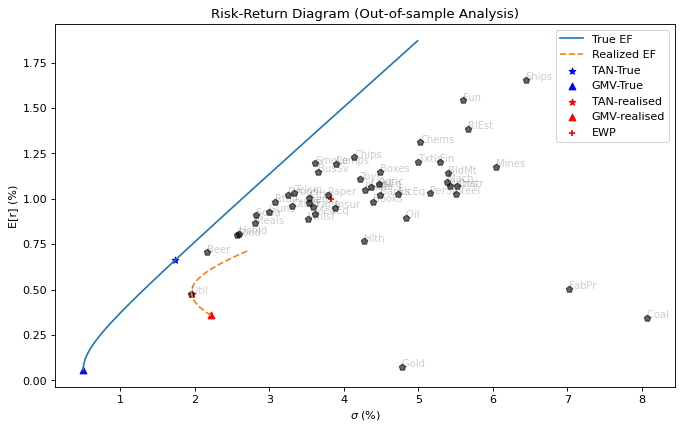

******
The tangency portfolio constructed from the testing data is:  [ 0.104  0.503 -0.544  0.278  0.146 -0.16  -0.079 -0.024 -0.215  0.092
  0.055 -0.381  0.011 -0.207  0.427  0.184 -0.183 -0.255 -0.471 -0.113
  0.991 -0.339  0.011 -0.43  -0.303  0.632  0.053  0.004  0.079  0.066
 -0.092  0.401 -0.111  0.337 -0.451  0.461  0.319 -0.235 -0.377  0.132
  0.566  0.308  0.107  0.8   -0.88   0.121 -0.407  0.068]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.108  0.059 -0.214  0.413  0.11  -0.335 -0.091 -0.071  0.089  0.091
  0.104 -0.23  -0.524 -0.083 -0.31   0.102 -0.269 -0.173 -0.267  0.042
  0.371 -0.226 -0.108 -0.142 -0.259  0.329  0.145  0.131  0.066 -0.079
  0.238  0.138  0.033  0.408 -0.278 -0.353  0.695  0.327 -0.291 -0.113
  1.045  0.222  0.064  0.334 -0.053  0.03  -0.212 -0.011]
******
The tangency portfolio constructed from the training data is:  [ 0.11   0.043  0.008 -0.036 -0.032  0.01  -0.042  0.098  0.255 -0.107
 -0.046  0.098 -0.039 -0.27 

In [ ]:
plot_evaluation_results_out_sample (mu_test6, V_test6, mu_train6, V_train6)

In [ ]:
mu_train7 = estimate_mu_general(df_FF).values 
V_train7 = estimate_cov_shrinkage(df_FF, 0.85)

mu_test7 = estimate_mu_general(df_FF_test).values
V_test7 = estimate_cov_shrinkage(df_FF_test, 0.85)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


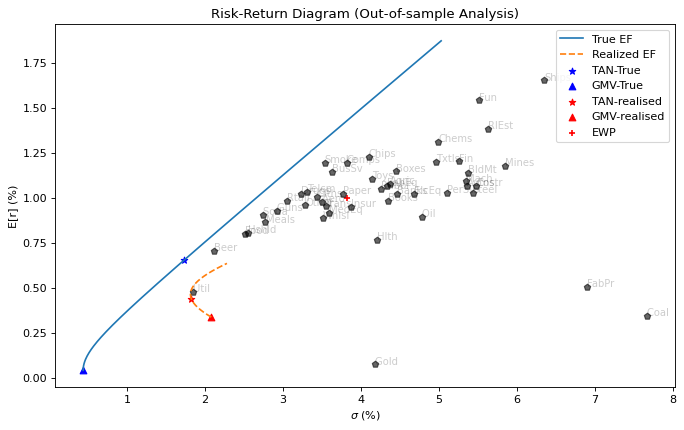

******
The tangency portfolio constructed from the testing data is:  [ 0.104  0.498 -0.54   0.281  0.145 -0.162 -0.078 -0.024 -0.211  0.093
  0.056 -0.381  0.003 -0.206  0.417  0.183 -0.185 -0.254 -0.469 -0.112
  0.983 -0.336  0.01  -0.426 -0.302  0.628  0.054  0.005  0.079  0.065
 -0.088  0.398 -0.109  0.336 -0.449  0.451  0.323 -0.229 -0.375  0.13
  0.573  0.306  0.106  0.796 -0.871  0.12  -0.404  0.069]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.108  0.049 -0.207  0.416  0.11  -0.339 -0.092 -0.073  0.096  0.091
  0.105 -0.227 -0.535 -0.081 -0.325  0.1   -0.271 -0.172 -0.262  0.046
  0.358 -0.225 -0.111 -0.135 -0.258  0.323  0.147  0.134  0.065 -0.083
  0.245  0.132  0.035  0.411 -0.274 -0.371  0.704  0.34  -0.29  -0.118
  1.055  0.221  0.063  0.322 -0.034  0.028 -0.208 -0.014]
******
The tangency portfolio constructed from the training data is:  [ 0.119  0.043  0.008 -0.031 -0.039  0.011 -0.049  0.11   0.27  -0.106
 -0.049  0.104 -0.036 -0.29  

In [ ]:
plot_evaluation_results_out_sample (mu_test7, V_test7, mu_train7, V_train7)

In [ ]:
mu_train8 = estimate_mu_general(df_FF).values 
V_train8 = estimate_cov_shrinkage(df_FF, 0.9)

mu_test8 = estimate_mu_general(df_FF_test).values
V_test8 = estimate_cov_shrinkage(df_FF_test, 0.9)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


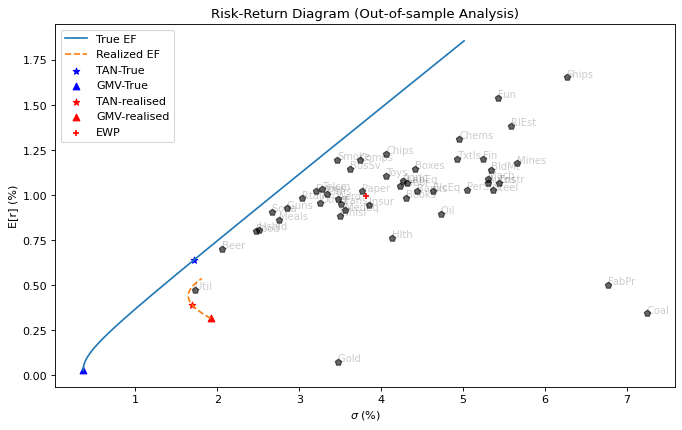

******
The tangency portfolio constructed from the testing data is:  [ 0.104  0.488 -0.532  0.285  0.144 -0.166 -0.078 -0.024 -0.203  0.093
  0.058 -0.378 -0.01  -0.203  0.399  0.18  -0.187 -0.252 -0.464 -0.108
  0.967 -0.333  0.007 -0.42  -0.301  0.621  0.056  0.008  0.079  0.063
 -0.081  0.392 -0.106  0.336 -0.445  0.432  0.332 -0.217 -0.372  0.124
  0.585  0.304  0.104  0.785 -0.852  0.118 -0.399  0.068]
The global minimum variance portfolio constructed from the testing data  is:  [ 0.108  0.039 -0.2    0.418  0.109 -0.343 -0.093 -0.074  0.102  0.091
  0.105 -0.223 -0.545 -0.079 -0.341  0.098 -0.273 -0.17  -0.258  0.049
  0.345 -0.223 -0.114 -0.129 -0.258  0.317  0.149  0.137  0.065 -0.087
  0.253  0.126  0.038  0.414 -0.27  -0.388  0.712  0.353 -0.288 -0.123
  1.066  0.219  0.063  0.311 -0.016  0.026 -0.204 -0.017]
******
The tangency portfolio constructed from the training data is:  [ 0.129  0.043  0.007 -0.024 -0.046  0.012 -0.057  0.124  0.287 -0.105
 -0.053  0.111 -0.031 -0.313

In [ ]:
plot_evaluation_results_out_sample (mu_test8, V_test8, mu_train8, V_train8)

From our 7 experiments, we found that the optimal lambda is 0.80 where the sharpe ratio difference between the realized and the true portfolios is the lowest among the 5.

It has the lowest difference of 0.1374 as compared to the next lowest of 0.1384 where lambda is 0.75. As the lambda moves towards 0.1 from 0.5, we can see the sharpe ratio difference increase from 0.1574 to >0.20.

Hence, moving into the opposite direction towards 1, we can see the sharpe ratio difference decrease to 0.1374 when lambda is 0.8. However, the sharpe ratio difference increases back to 0.1384 when lambda is 0.85. Hence, this suggests that the lambda of 0.80 provides us with the most robust portfolio construction model.

Therefore, we would be choosing the weights suggested by our portfolio where lambda is 0.80.


### Final Recommendations

Having selected the covariance matrix that is inclusive of the shrinkage estimator (of lambda 0.80), below is our final recommendation for our investment decision.

In [ ]:
mu_trainF = estimate_mu_general(df_FF).values
V_trainF = estimate_cov_shrinkage(df_FF, 0.8)

mu_testF = estimate_mu_general(df_FF_test).values
V_testF = estimate_cov_shrinkage(df_FF_test, 0.8)

OVERALL NUMBER OF ITERATIONS 20736
OVERALL NUMBER OF ITERATIONS 20736


In [ ]:
# Weights derived from the training data
final_w = tangency(mu_trainF, V_trainF)
final_w

array([ 0.11014958,  0.04313739,  0.00842185, -0.03617949, -0.03207146,
        0.0096538 , -0.0416978 ,  0.09781873,  0.2545724 , -0.10652284,
       -0.04571518,  0.09751413, -0.03881685, -0.27022086, -0.07431423,
        0.02751631, -0.11515921, -0.15959832, -0.07421915,  0.08624539,
       -0.04835046, -0.21009242, -0.10084968, -0.16250966, -0.00865484,
        0.12477811,  0.07366844,  0.00673249, -0.0186254 ,  0.15116703,
        0.50506024,  0.08413108, -0.02509535, -0.20256793,  0.10637147,
        0.06186995, -0.01620191,  0.198772  ,  0.12031381,  0.32532369,
        0.06286861,  0.20504652,  0.06741289, -0.09313428, -0.0939498 ,
        0.15003451,  0.03114764, -0.03518096])

In [ ]:
portfolio = {'Industry': assets.columns.values,
             'Weights': final_w
             }

portfolio = pd.DataFrame(portfolio).sort_values(by = 'Weights', ascending = False)
portfolio

,Industry,Weights
30,Util,0.505060
39,Trans,0.325324
8,Hshld,0.254572
41,Rtail,0.205047
37,Paper,0.198772
29,Oil,0.151167
45,RlEst,0.150035
25,Guns,0.124778
38,Boxes,0.120314
0,Agric,0.110150


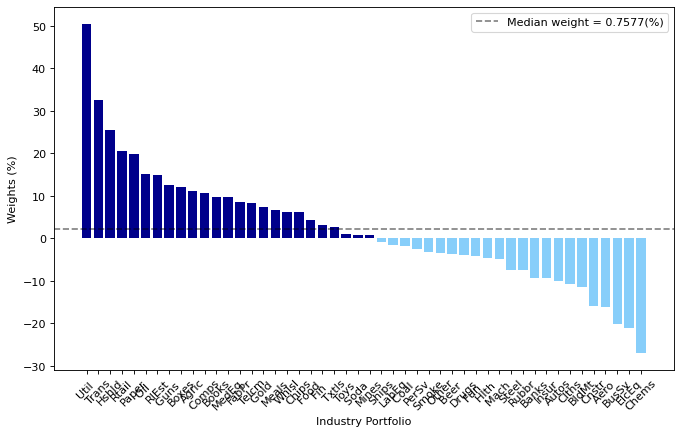

In [ ]:
x = portfolio['Industry']
y = portfolio['Weights'] * 100

med_w = np.round(y.median(),4)
label = 'Median weight = ' + str(med_w) + '(%)'

figure(figsize=(10, 6), dpi=80)
plt.bar(x, y, color=(y > 0).map({True: 'darkblue',False: 'lightskyblue'}))
plt.axhline(y=med_w, color='black', linestyle='--', alpha = 0.5, label = label)
plt.xticks(rotation = 45)

plt.xlabel('Industry Portfolio')
plt.ylabel('Weights (%)')
plt.legend()
plt.show()


Looking at the weights, we see most of the weights go to the Utilities and Transportation while our portfolio provided the most shorts on Chemicals and Electrical Equipment. Looking at the breakdown of the respective industries we can observe most weights go to public-service related industries but the biggest shorts go to the private sector manufacturing and services. 

In [ ]:
betas.columns = F.columns
betas.index = assets.columns

betas.loc[['Chems','ElcEq', 'BusSv', 'Util ', 'Trans', 'Hshld'], :]

,Mkt-RF,SMB,HML
Chems,1.089083,-0.048251,0.399824
ElcEq,1.267342,-0.097931,0.046660
BusSv,1.179516,0.145292,-0.651832
Util,0.518279,-0.205407,0.396131
Trans,0.992084,0.071349,0.438956
Hshld,0.774732,-0.162940,0.133165


Looking deeper into the 3 factor betas of the top 3 longs (Util, Trans, Hshld) and top 3 shorts (Chems, ElcEq, BusSv), we can see that the recommended portfolio prefers lower beta in market excess returns while preferring value companies as shown by the positive beta in HML (high minus low).

In [ ]:
# Evaluate the trained weights on the test data
mu = mu_testF
V = V_testF
w = final_w

evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)

{'Er': 0.4780470134928493,
 'Sharpe': 0.24456110991555863,
 'sigma': 1.9547139512815754,
 'var': 3.820906631334829}

In [ ]:
pf_m_ex_returns = evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)['Er'] 
pf_m_sigma = evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)['sigma'] 
pf_sharpe = evaluate_portfolio_performance_on_data(w, mu, V, rf = 0)['Sharpe'] 

# Assumes monthly compounding for returns 
pf_yr_ex_returns = ((1+pf_m_ex_returns/100)**12 - 1)*100

# Multiply sqrt(12) to annualise monthly standard deviation as an approximation
pf_yr_sigma = pf_m_sigma * np.sqrt(12)

metrics = {"Monthly": [pf_m_ex_returns,pf_m_sigma,pf_sharpe ],
           "Annually": [pf_yr_ex_returns,pf_yr_sigma,pf_sharpe ]}

ind = ['Excess Returns (%)', 'Standard Deviation (%)', 'Sharpe Ratio']

rec_metrics = pd.DataFrame(metrics)
rec_metrics.index = ind

rec_metrics

,Monthly,Annually
Excess Returns (%),0.478047,5.889823
Standard Deviation (%),1.954714,6.771328
Sharpe Ratio,0.244561,0.244561


With that, we recommend this portfolio with a sharpe ratio of 0.245 of an annual excess returns of 5.89% and standard deviation of 6.77%.